# Precipitaion Forecasting
In this project, we have trained different types of machine learning models on some data about weather to predict precipitation.

## Introduction
Weather forecasting is using data about the current state and predict how the atmosphere will change. Weather warnings are used to protect lives and property, weather forecasting improves transportation safety, and precipitation forecasting is important to agriculture. There are many different ways of weather prediction. We have used machine learning models and compared the predicted results with actual values.
#### Study area
Basel is a city in northwest Switzerland. On average 32% of days of the year are rainy or snowy. The total precipitation is around 840 mm annually. May receives the wettest month in Basel with an average of 98 mm of rain.

## Methodology
The following libraries are used.

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

from preprocessing import get_data, drop_missing_data, change_resolution_to_daily, write_daily_data, read_daily_data
from visualize import show_histogram
from models import linear_model

At first, data is collected. Then, some preprocessing techniques are used to prepare data for machine learning models. Finally, different machine learning techniquies are applied and the accuracy for each is reported. 

## Dataset
**You can find and download the dataset in [this](https://www.meteoblue.com/en/weather/archive/export) link.**
#### About dataset
This dataset contains some attributes about weather for Basel, from January, 2014 to November, 2023 with hourly resolution. The first nine rows are some basic information about location of city and units of measurements which we do not need it.

In [ ]:
data = get_data()
print(f"Number of samples:      {data.shape[0]}")
print(f"Number of features:     {data.shape[1]}")

### Cleaning dataset
There are some rows at the end of dataset which are empty, missing data. We simply drop them. A day after the missing data is not complete. For simplicity we remove this day as well.

In [ ]:
missing_data = drop_missing_data(data)
print(f"Number of missing rows: {missing_data}")
print(f"Number of samples:      {data.shape[0]}")

## Features
In our data, each row represents a sample and each column represents a feature. Here is the list of columns
- Temperature (T)
- Precipitation Total (PT)
- Relative Humidity (RH)
- Wind Speed (WS)
- Wind Direction (WD)
- Cloud Cover Total (CCT)
- Mean Sea Level Pressure (MSLP)

measured hourly. PT is actually the target value. This list is raw and we will do some operations to get ready for models.

### Make samples daily
Forecasting for a whole day is more general than one hour, so we decide to merge each 24 examples to convert the resolution to daily. A good questio is how? One way is to get mean for each feature.
- Specifically for temperature, having maximum, minimum, and mean is better.
- Precipitation should be the sum instead of mean.
- Now we have 9 columns(features) and 3603 rows(samples).

In [ ]:
daily_data = change_resolution_to_daily(data)
daily_data

For saving time, we write daily data in a file.

In [ ]:
write_daily_data(daily_data)

In [5]:
_, FEATURES, X, y = read_daily_data()

### Splitting data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)
print(f"X_teset shape:  {X_test.shape}")
print(f"X_train shape:  {X_train.shape}")
print(f"y_teset shape:  {y_test.shape}")
print(f"y_train shape:  {y_train.shape}")
X_train

### Visualize parameters distribution
A [histogram](https://www.investopedia.com/terms/h/histogram.asp#:~:text=A%20histogram%20is%20a%20graph,how%20often%20that%20variable%20appears) is a graph that shows the frequency of numerical data using rectangles. The height of each rectangle represents the distribution frequency of a variable. The width of the rectangle represents the value of the variable. Here is the histogram for features and target value.

In [ ]:
show_histogram(X_train.values)

In [4]:
stnd_s = StandardScaler()

## Models
We start by Linear Model.

### Linear Model
In this model, target value is expected to be a linear combination of the features.

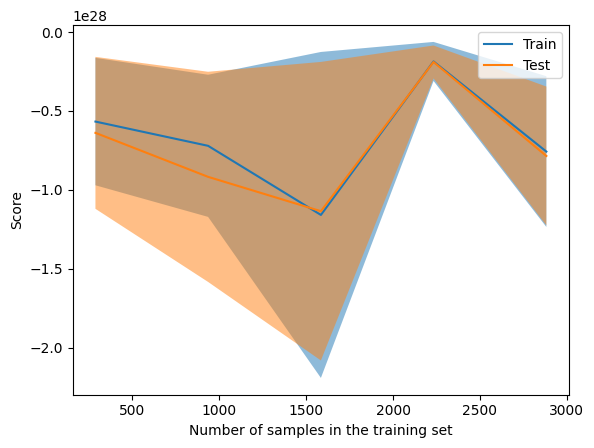

In [6]:
accuracy_table = linear_model(X, y)

In [7]:
accuracy_table

,train_sizes,train_scores,test_scores
0,288.0,-5.675224e+27,-6.390053e+27
1,936.0,-7.212353e+27,-9.179361e+27
2,1585.0,-1.159473e+28,-1.135711e+28
3,2233.0,-1.862844e+27,-1.896365e+27
4,2882.0,-7.577660e+27,-7.855379e+27


The accuracy is meaningless. The reason is we don't apply scaling.

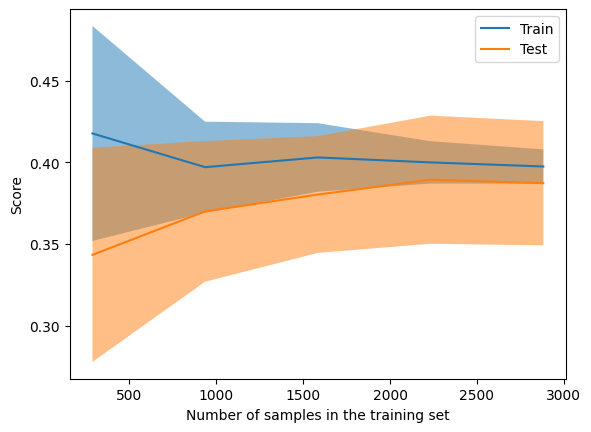

In [8]:
X_std = stnd_s.fit_transform(X)
accuracy_table = linear_model(X_std, y)

In [9]:
accuracy_table

,train_sizes,train_scores,test_scores
0,288.0,0.417678,0.343311
1,936.0,0.397019,0.369925
2,1585.0,0.402981,0.380265
3,2233.0,0.399941,0.389349
4,2882.0,0.397429,0.387173


An attractive trend is when Train Size becomes larger, Train Score decreases and Test Score increases. In general, accuracy for Linear Model is about 40 percent and this is not good.

In [ ]:
import torch
import torch.nn as nn


class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(20000, 1)
        # self.linear2 = nn.Linear(10000,5000)
        # self.linear3 = nn.Linear(5000, 2500)
        # self.linear4 = nn.Linear(2500, 1250)
        # self.linear5 = nn.Linear(1250, 625)
        # self.linear6 = nn.Linear(625, 125)
        # self.linear7 = nn.Linear(125, 1)
        
    def forward(self, xb):
        xb.to(device)
        out = self.linear1(xb.to(device)).to(device)
        # out = self.linear2(out.to(device)).to(device)
        # out = self.linear3(out.to(device)).to(device)
        # out = self.linear4(out.to(device)).to(device)
        # out = self.linear5(out.to(device)).to(device)
        # out = self.linear6(out.to(device)).to(device)
        # out = self.linear7(out.to(device)).to(device)
        return out

### Other Models
This is like ...
If we apply it, results:
###### SOME FIGUERS AND PLOTS TO SHOW THE RESULTS
Calculate performance, error, advantages and disadvantages

## Conclusion
- Forecasting is good.
- Undestand that these features have a stronger affect in result.
- This Model is better in performance.
- Add references if necessary.